# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Loading Data & Libraries**

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor



import warnings
warnings.filterwarnings('ignore')

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#Importing Data
file_path = '/content/drive/MyDrive/SeoulBikeData.csv'
df = pd.read_csv(file_path,encoding= 'unicode_escape')

## **Exploring Data**

In [96]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [97]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [98]:
df.shape

(8760, 14)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [100]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Checking if there exists any NULL in the data.

In [101]:
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


So the data has no null value

# **Data Visualization and Manipulation**

In [102]:
#Getting only Numerical Columns
n_df = df.select_dtypes(exclude=["object_"])

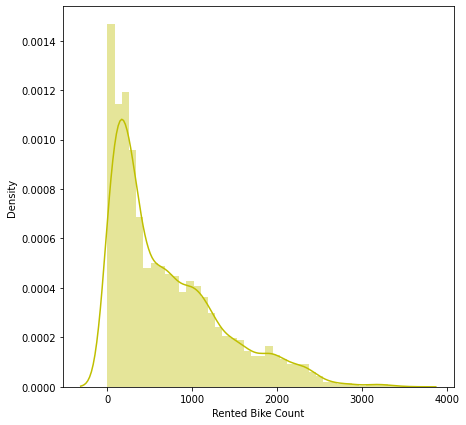

In [103]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="y")

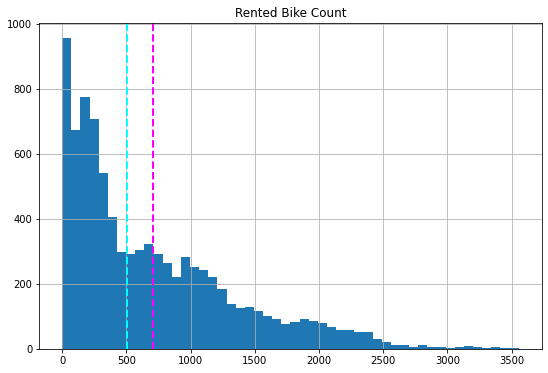

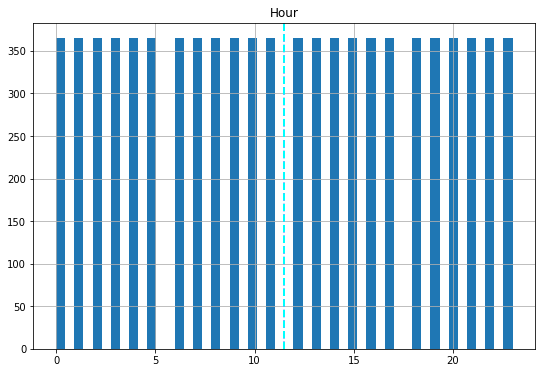

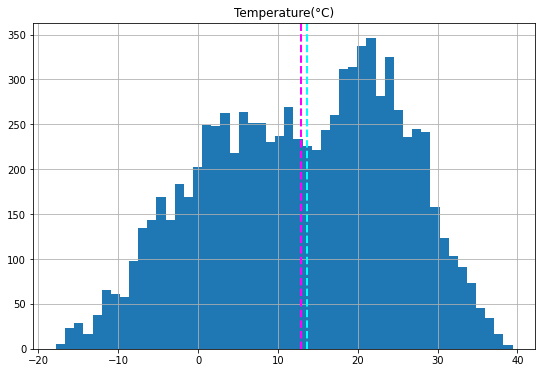

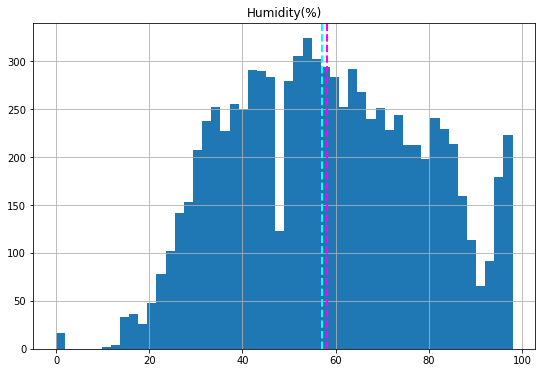

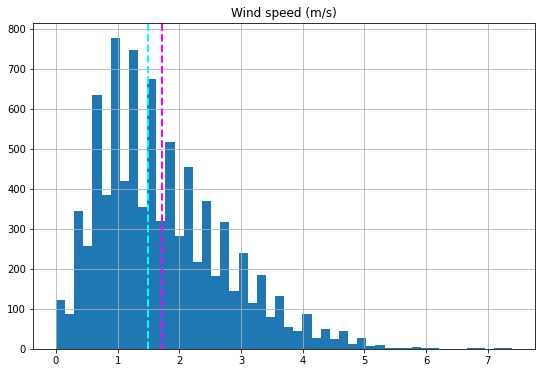

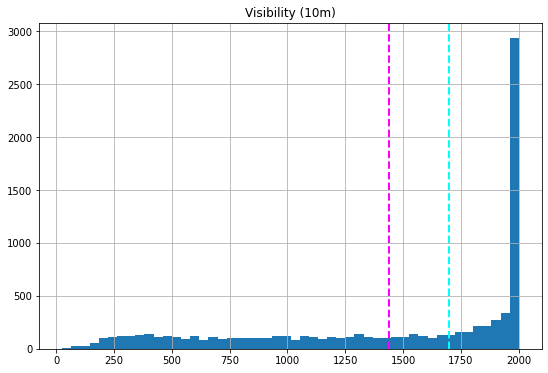

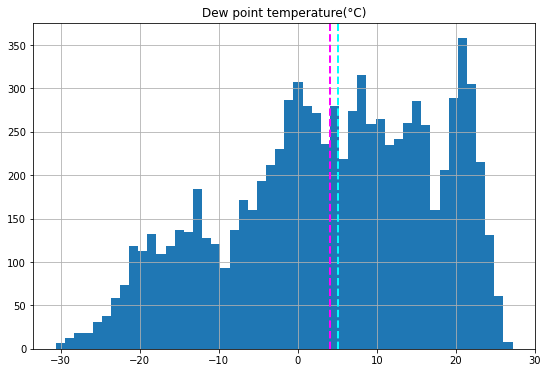

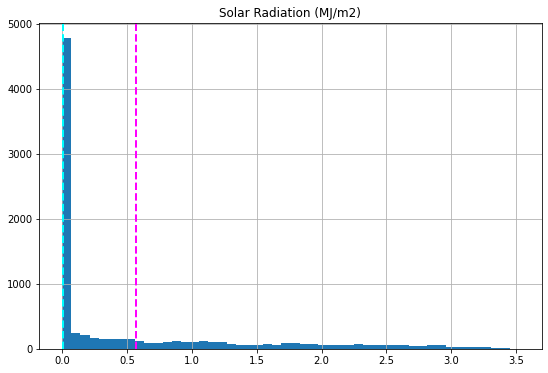

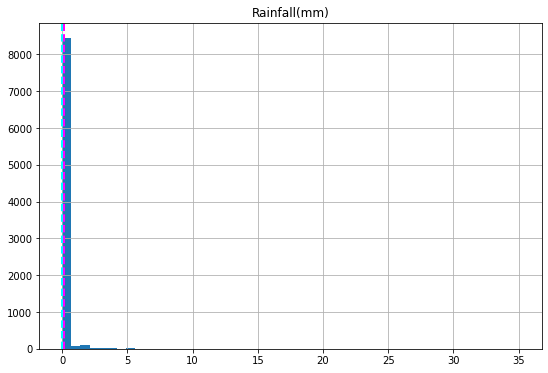

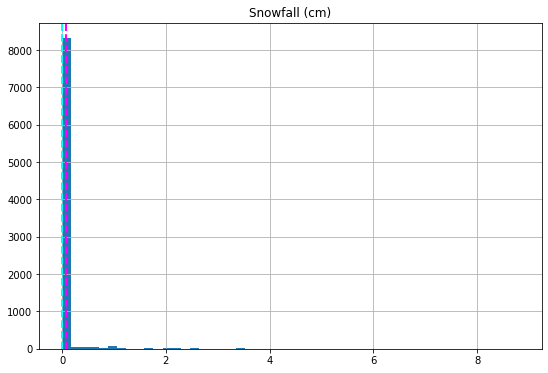

In [104]:
for col in n_df[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

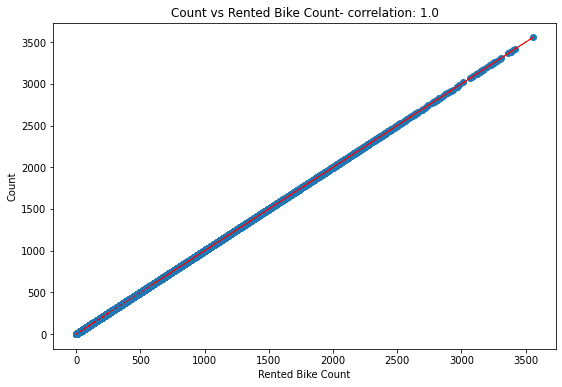

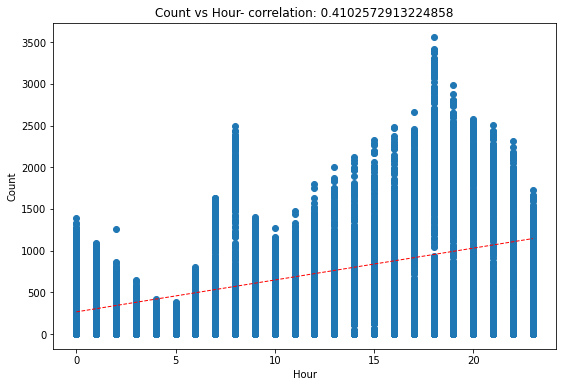

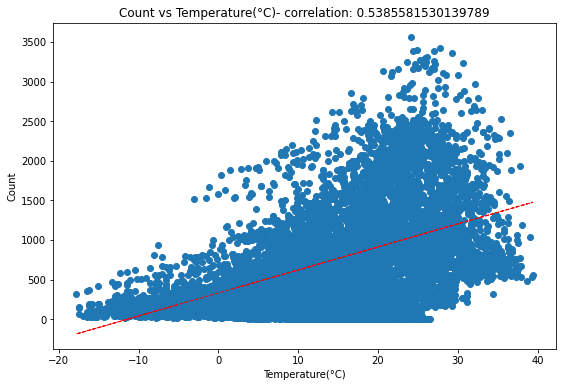

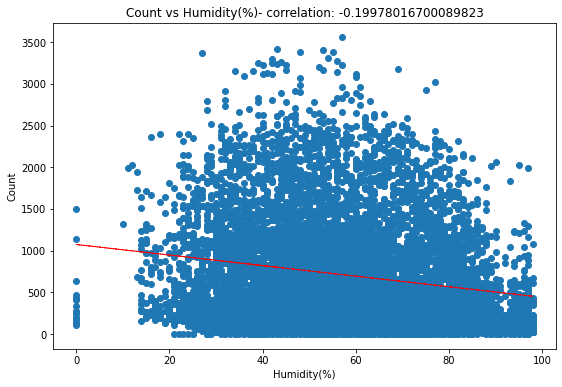

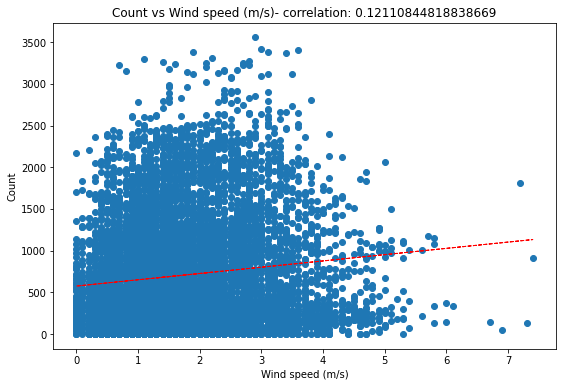

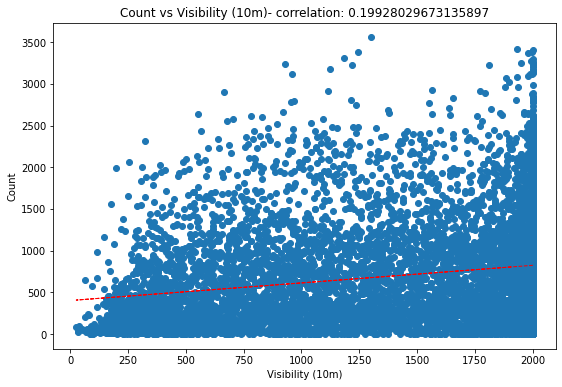

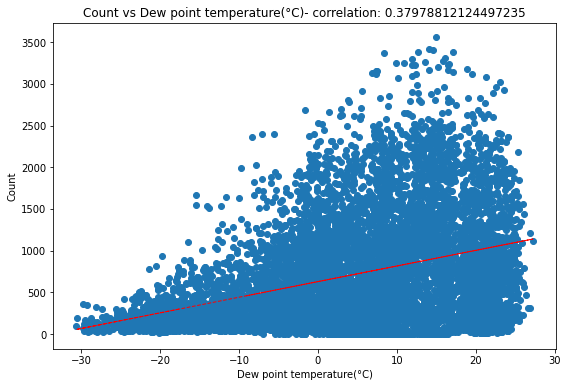

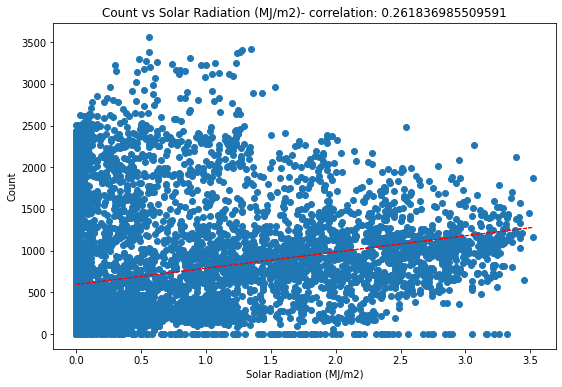

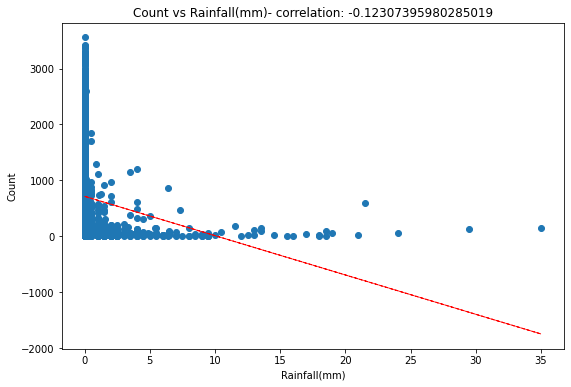

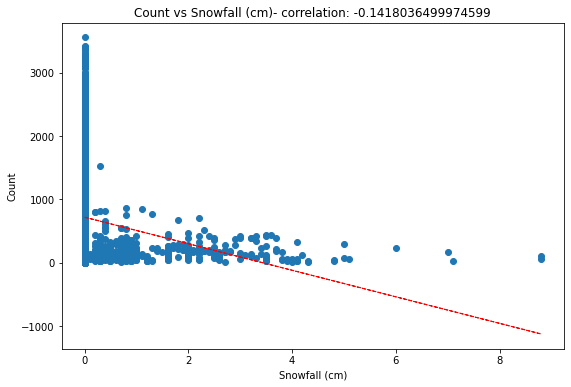

In [105]:
for col in n_df:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Count')
    ax.set_title('Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

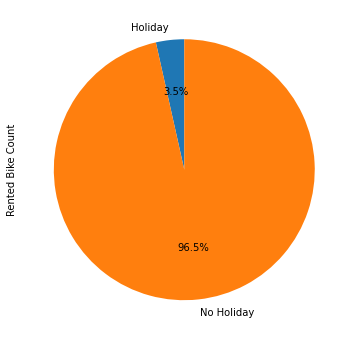

In [106]:
#Holiday vs Rented Bike Count
df.groupby('Holiday').sum()['Rented Bike Count'].plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90)

In [107]:
df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False)

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64

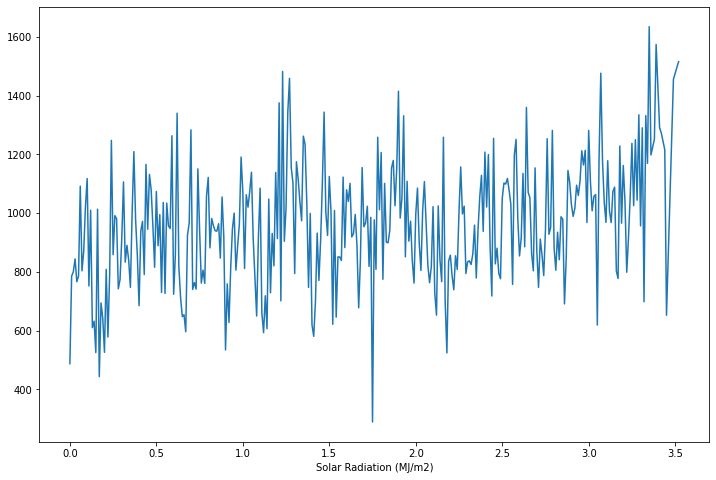

In [108]:
#Temperature vs Rented Bike Count
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot(figsize = (12,8))

*We can see that when temperature gets high the number of Bike rents also increases.*

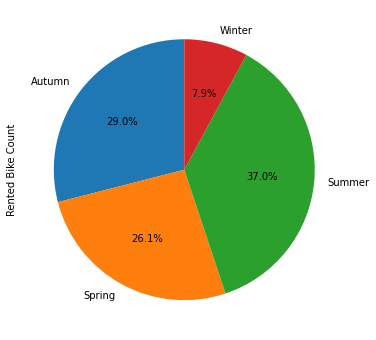

In [109]:
#Seasons vs Rented Bike Count
df.groupby('Seasons').sum()['Rented Bike Count'].plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90)

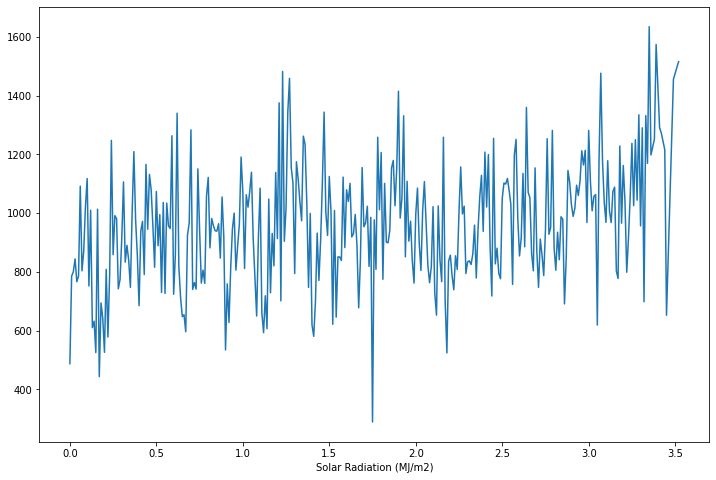

In [110]:
#Solar Radtion vs Rented Bike count
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot(figsize = (12,8))

In [111]:
#Featuring Month column 
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [112]:
df['Month']=df['Date'].dt.month

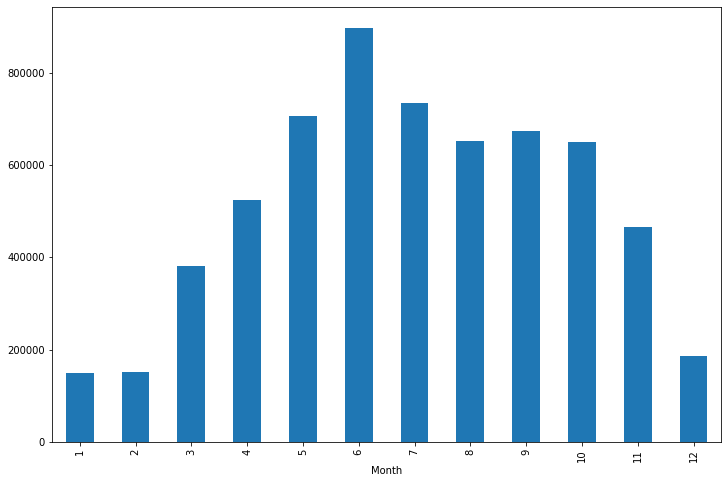

In [113]:
df.groupby('Month').sum()['Rented Bike Count'].plot.bar(figsize =(12,8))

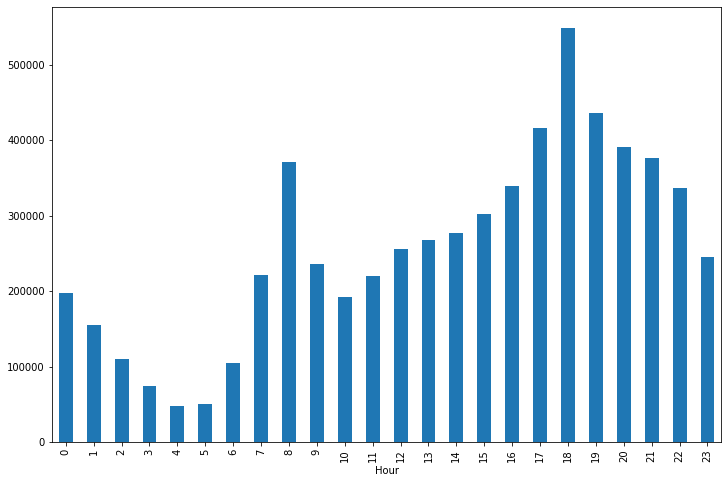

In [114]:
#Hour vs Rented Bike Count
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(figsize=(12,8))

In [115]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

##Numerical Variables

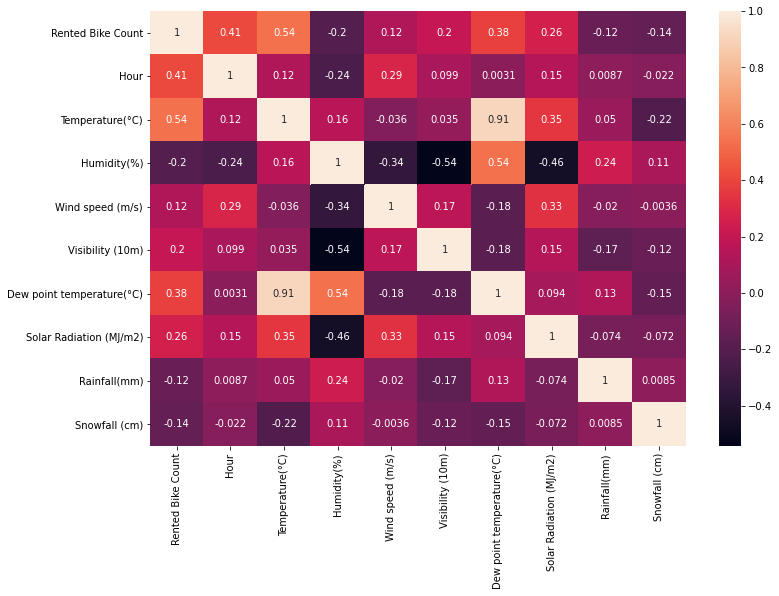

In [116]:
corrMatrix = n_df.corr()
ax = plt.subplots(figsize=(12,8))  
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [117]:
def correlation(n_df, threshold,threshold_2):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = n_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold or corr_matrix.iloc[i, j] < threshold_2 : # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [118]:
corr_features = correlation(n_df, 0.7,-0.2)
len(set(corr_features))

6

In [119]:
corr_features

{'Dew point temperature(°C)',
 'Humidity(%)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Wind speed (m/s)'}

We have to Analyze features one by one.

We will remove 'Dew point temperature(°C),Humidity(%) and Snowfall (cm).

In [120]:
num = n_df.drop(columns=['Dew point temperature(°C)', 'Humidity(%)','Snowfall (cm)'])

## Categorical Variables

In [121]:
#Dealing with Categorical columns
a = df[['Functioning Day','Holiday','Seasons']]

In [122]:
a = pd.get_dummies(a,drop_first=True)

In [123]:
a.head()

,Functioning Day_Yes,Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,1,0,0,1
1,1,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,1,1,0,0,1


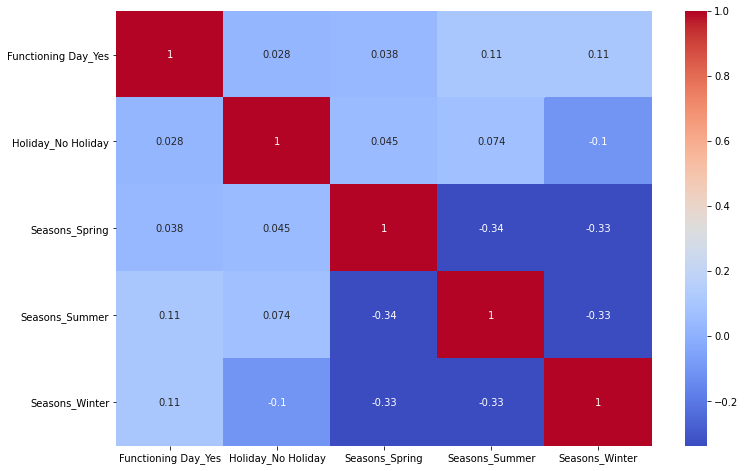

In [124]:
plt.figure(figsize=(12,8))
correlation = a.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [125]:
def correlation(a, threshold,threshold_2):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = a.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold or corr_matrix.iloc[i, j] < threshold_2 : # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [126]:
corr_features = correlation(a, 0.7,0.0)
len(set(corr_features))

2

In [127]:
corr_features

{'Seasons_Summer', 'Seasons_Winter'}

We will remove Seasons_Summer & Seasons_Winter Column

In [128]:
a = a.drop(columns=['Seasons_Summer', 'Seasons_Winter'])

In [129]:
new_df = pd.concat([a, num], axis=1)

In [130]:
new_df.head()

,Functioning Day_Yes,Holiday_No Holiday,Seasons_Spring,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm)
0,1,1,0,254,0,-5.2,2.2,2000,0.0,0.0
1,1,1,0,204,1,-5.5,0.8,2000,0.0,0.0
2,1,1,0,173,2,-6.0,1.0,2000,0.0,0.0
3,1,1,0,107,3,-6.2,0.9,2000,0.0,0.0
4,1,1,0,78,4,-6.0,2.3,2000,0.0,0.0


# **Modeling**

##**Implementing Linear Regression**

In [176]:
y = new_df['Rented Bike Count']
X = new_df.drop('Rented Bike Count', axis = 1)

In [177]:
#Splitting the data into the training & test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [178]:
#Transorming Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
#Fitting Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
#Predciting
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [181]:
#Train Set model
train_set_rmse = (np.sqrt(mean_squared_error(y_pred_train,y_train )))
train_set_r2 = r2_score(y_train, y_pred_train)
print(train_set_rmse)
print(train_set_r2)

452.51446390154047
0.5072373004861985


In [182]:
#Test set model
test_set_rmse = (np.sqrt(mean_squared_error(y_pred_test,y_test )))
test_set_r2 = r2_score(y_test, y_pred_test)
print(test_set_rmse)
print(test_set_r2)

457.7592179255287
0.4976298110848517


In [183]:
regressor.score(X_train,y_train)

0.5072373004861985

In [184]:
regressor.coef_

array([  816.89318709,   137.02017385,    60.97134316,   697.41463743,
        1566.58240543,    87.83381829,   299.59023976,   -18.37337039,
       -2480.77069237])

##**Using Polynomial Features**

In [185]:
polynomial_features= PolynomialFeatures(degree=2)

In [186]:
#Splitting data into training and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [187]:
#Transforming
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

In [188]:
regressor.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
#Predicting
y_poly_pred_train = regressor.predict(X_poly_train)
y_poly_pred_test = regressor.predict(X_poly_test)

In [190]:
#Train Model
rmse_train = math.sqrt(mean_squared_error(y_poly_pred_train,y_train))
r2_train = r2_score(y_train,y_poly_pred_train)
print(rmse_train)
print(r2_train)

391.5306202135276
0.631103648561094


In [191]:
#Test model
rmse_test = math.sqrt(mean_squared_error(y_poly_pred_test,y_test))
r2_test = r2_score(y_test,y_poly_pred_test)
print(rmse_test)
print(r2_test)

400.16409455513855
0.616093116172757


##**Implementing Lasso Regression**

In [192]:
lasso = Lasso(alpha=0.0 , max_iter= 4000)

In [193]:
#Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0)

In [194]:
#transforming
std = StandardScaler()
X_train_lasso = std.fit_transform(X_train)
X_test_lasso = std.transform(X_test)

In [195]:
#Fitting Model
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=4000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
#Predicting
y_lasso_pred_train = lasso.predict(X_train_lasso)
y_lasso_pred_test = lasso.predict(X_test_lasso)

In [197]:
#Train Set model
train_set_rmse_lasso = (np.sqrt(mean_squared_error(y_lasso_pred_train,y_train)))
train_set_r2_lasso = r2_score(y_train, y_lasso_pred_train)
print(train_set_rmse_lasso)
print(train_set_r2_lasso)

452.51446390154047
0.5072373004861985


In [198]:
#Test set model
test_set_rmse = (np.sqrt(mean_squared_error(y_lasso_pred_test,y_test)))
test_set_r2 = r2_score(y_test, y_lasso_pred_test)
print(test_set_rmse)
print(test_set_r2)

457.7592179255286
0.4976298110848518


In [199]:
lasso.score(X_train_lasso, y_train)

0.5072373004861985

In [200]:
lasso.coef_

array([142.02867615,  30.01310114,  26.47860062, 209.56806516,
       330.50224453,  12.32962157,  92.65667405,  -4.5579841 ,
       -82.20284233])

In [201]:
#Grid Search On Lasso
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train_lasso,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Lasso(alpha=0.0, copy_X=True, fit_intercept=True,
                             max_iter=4000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [202]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.51 with Alpha = 1.00
 


##**Implementing Ridge Regression** 

In [203]:
ridge = Ridge(alpha=30 , max_iter= 4000)

In [204]:
#Splitting Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [205]:
#Transforming Data
std = StandardScaler()
X_train_ridge = std.fit_transform(X_train)
X_test_ridge = std.transform(X_test)

In [206]:
#Fitting Model
ridge.fit(X_train_ridge, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=4000, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [207]:
#Predicting
y_ridge_pred_train = ridge.predict(X_train_ridge)
y_ridge_pred_test = ridge.predict(X_test_ridge)

In [208]:
#Train Set model
train_set_rmse_ridge = (np.sqrt(mean_squared_error(y_ridge_pred_train,y_train)))
train_set_r2_ridge = r2_score(y_train, y_ridge_pred_train)
print(train_set_rmse_ridge)
print(train_set_r2_ridge)

455.5637455262472
0.5070365785201185


In [209]:
#Test set model
test_set_rmse = (np.sqrt(mean_squared_error(y_ridge_pred_test,y_test)))
test_set_r2 = r2_score(y_test, y_ridge_pred_test)
print(test_set_rmse)
print(test_set_r2)

448.60344605584623
0.49781894373560376


In [210]:
#Grid Search On Ridge
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
gridSearchridge=GridSearchCV(ridge,parameters,scoring='r2',cv=4)
gridSearchridge.fit(X_train_ridge,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=30, copy_X=True, fit_intercept=True,
                             max_iter=4000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [211]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchridge.best_score_,gridSearchridge.best_params_['alpha']))

The best R2 train score is : 0.50 with Alpha = 20.00
 


## **Conlcusion**



1.   Morning on 8:00 am and after 4:00 pm to 10:00 pm is the peak time where the bikes are rented more. I beleive this is the time where people rent bike on Office oepning & Closing time. 
2.   Seoul is the capital of South Korea which is a cold place so they love to travel on bike when there is Hot and mild weather that is the reason in Summer , Autoumn & Spring 92%  bikes are rented and they refuse in Winters.
3.   96.5% Bike are rented in Working days.

